### Data Modeling

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the data
df = pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
df.shape

(319795, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [6]:
df.HeartDisease.value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [7]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [8]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder
 
# label_encoder object knows how to understand word labels.
le = LabelEncoder()

df2 = df.copy()
 
# Encode labels in column 'species'.
df2['HeartDisease']= le.fit_transform(df2['HeartDisease'])
df2['Smoking']= le.fit_transform(df2['Smoking'])
df2['AlcoholDrinking']= le.fit_transform(df2['AlcoholDrinking'])
df2['Stroke']= le.fit_transform(df2['Stroke'])
df2['DiffWalking']= le.fit_transform(df2['DiffWalking'])
df2['Sex']= le.fit_transform(df2['Sex'])
df2['AgeCategory']= le.fit_transform(df2['AgeCategory'])
df2['Race']= le.fit_transform(df2['Race'])
df2['Diabetic']= le.fit_transform(df2['Diabetic'])
df2['PhysicalActivity']= le.fit_transform(df2['PhysicalActivity'])
df2['GenHealth']= le.fit_transform(df2['GenHealth'])
df2['Asthma']= le.fit_transform(df2['Asthma'])
df2['KidneyDisease']= le.fit_transform(df2['KidneyDisease'])
df2['SkinCancer']= le.fit_transform(df2['SkinCancer'])

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score

In [15]:
y = df2["HeartDisease"]
X = df2.drop(columns="HeartDisease")

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [17]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [22]:
# Creating various classifier instances as a list.

# models = [KNeighborsClassifier(), LogisticRegression(), tree.DecisionTreeClassifier(), 
# RandomForestClassifier(n_estimators=128, random_state=78),ExtraTreesClassifier(random_state=1, n_estimators=50), 
# AdaBoostClassifier(random_state=1, n_estimators=50, base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1))]

# models = [AdaBoostClassifier(random_state=1, n_estimators=50, base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1))]
models = [LogisticRegression(),tree.DecisionTreeClassifier(),RandomForestClassifier(n_estimators=128, random_state=78)]

compare = pd.DataFrame(columns=["Model", "F1", "Recall", "Accuracy"])
# compare = pd.DataFrame({"Model": ["Logistic Regression", "Decision Tree", "Random Forest"]})
acc_list = []

for m in models:
    m.fit(X_train_scaled, y_train)
    y_pred = m.predict(X_test_scaled)
    f1 = f1_score(y_test,y_pred)
    acc = accuracy_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    
    compare = compare.append({'Model': m, 'F1': f1, 'Recall': recall, 'Accuracy': acc}, ignore_index=True)
    acc_list.append(acc)
    print(f'Model used: {str(m)}')
    print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
    print(f'Precission Score: {precision_score(y_test,y_pred)}')
    print(f'Recall Score: {recall_score(y_test,y_pred)}')
    print(f'F1 Score: {f1_score(y_test,y_pred)}')
#     print(f'ROC_AUC: {roc_auc_score(y_test, y_pred)}')
    print(f1)
    print(acc_list)
    compare
    print('-------------------------------------', '\n')


Model used: LogisticRegression()
Accuracy Score: 0.9149332699595992
Precission Score: 0.4983922829581994
Recall Score: 0.09121671325584817
F1 Score: 0.1542096754135058
0.1542096754135058
[0.9149332699595992]
------------------------------------- 

Model used: DecisionTreeClassifier()
Accuracy Score: 0.8621996522783274
Precission Score: 0.22346002621231978
Recall Score: 0.25084596145358246
F1 Score: 0.23636237610036734
0.23636237610036734
[0.9149332699595992, 0.8621996522783274]
------------------------------------- 

Model used: RandomForestClassifier(n_estimators=128, random_state=78)
Accuracy Score: 0.9054147018724437
Precission Score: 0.33660828705681334
Recall Score: 0.11593350007356186
F1 Score: 0.17246662289341214
0.17246662289341214
[0.9149332699595992, 0.8621996522783274, 0.9054147018724437]
------------------------------------- 



In [23]:
acc_lables = ["Logistic Regression", "DecisionTree","RandomForest"]

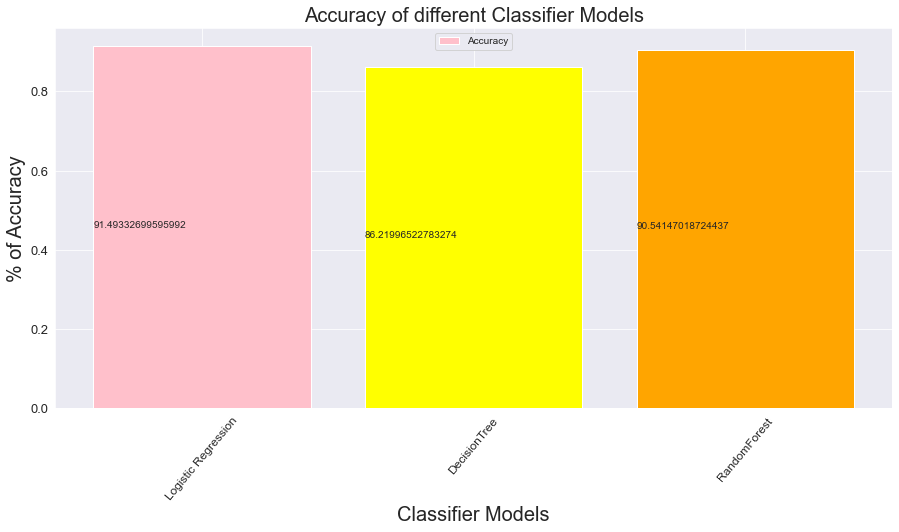

In [84]:
x_axis = acc_lables
y_axis = acc_list
colors = ['pink', 'yellow', 'orange']

# Create the plot
# setting figure size by using figure() function 
plt.figure(figsize = (15, 7))
      
bars = plt.bar(x_axis, y_axis, color=colors, label='Accuracy')
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 50)
plt.yticks(fontsize = 13)


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval/2, yval*100)
    
# Add the legend.
plt.legend()
plt.show()